In [16]:
import numpy as np
from scipy import optimize as opt
import scipy.linalg as la
from matplotlib import pyplot as plt
%matplotlib inline

### Problem 1

Careful differentiation yields that $x_{uuu}(u) = - \left(F_{xxx}\{x(u),u)\}x_u^3(u) + 3F_{xxu}\{x(u),u\}x_u^2(u)+3F_{xx}\{x(u),u\}x_{uu}(u)x_u(u)+3F_{xuu}\{x(u),u\}x_u(u)+3F_{xu}\{x(u),u\}x_{uu}(u)+F_{uuu}\{x(u),u\}\right)/ F_x\{x(u),u\}$

where $x_{u}(u)$ and $x_{uu}(u)$ are defined as previously.

### Problem 2

In [2]:
# Initialize model parameters

alpha = 0.33
z = 1.0
b = 2.0
t = 0.1
h = 24.0

In [3]:
# Define the equation necessary for numerical differentiation

def E(inputs, *params):
    w = inputs
    k = params
    print(k)
    print(w)
    
    nd = k * (((1 - alpha) * z) / w) ** (1/alpha)
    pi = z * (k ** alpha) * (nd **(1 - alpha)) - w * nd
    ns = h - (b / (w * (1 + b))) * (w * h + pi - t)
    E = ns - nd
    return E

def E(inputs, params):
    w = inputs
    k = params
    
    nd = k * (((1 - alpha) * z) / w) ** (1/alpha)
    pi = z * (k ** alpha) * (nd **(1 - alpha)) - w * nd
    ns = h - (b / (w * (1 + b))) * (w * h + pi - t)
    E = ns - nd
    return E

w_init = 0.5
w5 = opt.fsolve(E, np.array([0.5]), args = 5)
w10 = opt.fsolve(E, np.array([0.5]), args = 10)

In [4]:
e = 1e-5

def Fx(F, x, y):
    return (F(x+e,y) - F(x-e,y))/(2*e)

def Fy(F, x, y):
    return (F(x,y+e) - F(x,y-e))/(2*e)

def Fxx(F, x, y):
    return (F(x+e,y)-2*F(x,y)+F(x-e,y))/(e**2)

def Fyy(F, x, y):
    return (F(x,y+e)-2*F(x,y)+F(x,y-e))/(e**2)

def Fxy(F, x, y):
    return (F(x+e,y+e)-F(x-e,y+e)-F(x+e,y-e)+F(x-e,y-e))/(4*e**2)

def wk(F, x, y):
    return -Fy(F,x,y)/Fx(F,x,y)

def wkk(F, x, y):
    numerator = Fxx(F,x, y)*(wk(F,x, y)**2) + 2*Fxy(F,x, y)*wk(F,x, y) +\
        Fyy(F,x, y)
    denominator = Fx(F,x, y)
    return -numerator/denominator

In [5]:
def linear(k, w0, k0):
    return w0 + wk(E,w0, k0)*(k-k0)

def quadratic(k, w0, k0):
    return w0 + wk(E,w0, k0) * (k-k0) + .5 * wkk(E,w0, k0) * ((k - k0)  ** 2)

In [6]:
dom = np.linspace(1,15,100)
actual = np.zeros_like(dom)
for i in range(len(dom)):
    actual[i] = opt.root(E, np.array([0.5]), args = dom[i]).x[0]

About k=5:

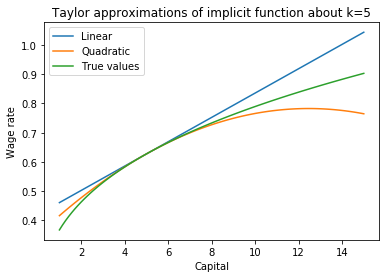

In [7]:
plt.plot(dom, linear(dom, w5, 5), label = "Linear")
plt.plot(dom, quadratic(dom, w5, 5), label = "Quadratic")
plt.plot(dom, actual, label = "True values")
plt.title("Taylor approximations of implicit function about k=5")
plt.xlabel("Capital")
plt.ylabel("Wage rate")
plt.legend()
plt.show()

About k=10:

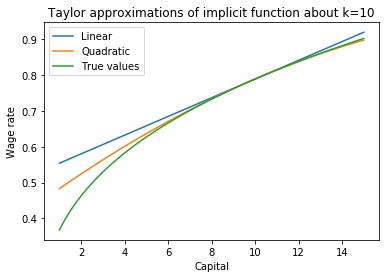

In [8]:
plt.plot(dom, linear(dom, w10, 10), label = "Linear")
plt.plot(dom, quadratic(dom, w10, 10), label = "Quadratic")
plt.plot(dom, actual, label = "True values")
plt.title("Taylor approximations of implicit function about k=10")
plt.xlabel("Capital")
plt.ylabel("Wage rate")
plt.legend()
plt.show()

### Problem 3

In [9]:
e = 1e-5

def F(x, y):
    return (x**.35+.9*x-y)**(-2.5) - .95*(y**.35+.9*y)**(-2.5)

def Fx(x, y):
    return (F(x+e,y) - F(x-e,y))/(2*e)

def Fy(x, y):
    return (F(x,y+e) - F(x,y-e))/(2*e)

def Fxx(x, y):
    return (F(x+e,y)-2*F(x,y)+F(x-e,y))/(e**2)

def Fyy(x, y):
    return (F(x,y+e)-2*F(x,y)+F(x,y-e))/(e**2)

def Fxy(x, y):
    return (F(x+e,y+e)-F(x-e,y+e)-F(x+e,y-e)+F(x-e,y-e))/(4*e**2)

def Fxxx(x, y):
    return (F(x+2*e, y)-2*F(x+e,y)+2*F(x-e,y)-F(x-2*e,y))/(2*e**3)

def Fxxy(x, y):
    return (F(x+2*e,y+e) - 2*F(x, y+e) -\
            F(x+2*e, y-e)+F(x-2*e,y+e)+2*F(x, y-e)-F(x-2*e, y-e))/(8*e)

def Fxyy(x, y):
    return (F(x-e,y+2*e)-2*F(x-e,y)-F(x+e,y+2*e)+\
            2*F(x-e,y-2*e)-F(x+e,y-2*e))/(8*e)

def Fyyy(x, y):
    return (F(x,y+2*e)-2*F(x,y+e)+2*F(x,y-e)-F(x,y-2*e))/(2*e**3)

In [10]:
def yu(x, y):
    return -Fx(x,y)/Fy(x,y)

def yuu(x, y):
    numerator = Fyy(x, y)*(yu(x, y)**2) + 2*Fxy(x, y)*yu(x, y) + Fxx(x, y)
    denominator = Fy(x, y)
    return -numerator/denominator

def yuuu(x, y):
    numerator = Fyyy(x,y)*(yu(x,y)**3)+Fxyy(x,y)*(yu(x,y)**2)+2*Fyy(x,y)*yuu(x,y)*yu(x,y)+\
        2*Fxyy(x,y)*(yu(x,y)**2)+2*Fxxy(x,y)*yu(x,y)+2*Fxy(x,y)*yuu(x,y)+Fyy(x,y)*yuu(x,y)*yu(x,y)+\
        Fxy(x,y)*yuu(x,y)+Fxxy(x,y)*yu(x,y)+Fxx(x,y)
    denominator = Fy(x, y)
    return -numerator/denominator

In [11]:
x0 = 100
y0 = 49.2166

def linear(x):
    return y0 + yu(x0, y0) * (x-x0)

def quadratic(x):
    return y0 + yu(x0, y0) * (x-x0) + .5 * yuu(x0, y0) * ((x - x0)  ** 2)

def cubic(x):
    return y0 + yu(x0, y0) * (x-x0) + .5 * yuu(x0, y0) * ((x - x0)  ** 2) + (1 / 6) * yuuu(x0, y0) * ((x - x0) ** 3)



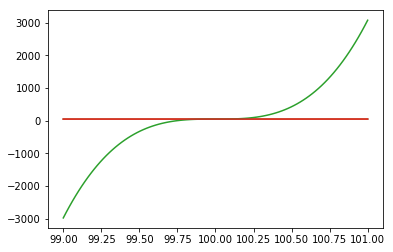

In [13]:
def F1(inputs, params):
    y = inputs[0]
    x = params
    return (x ** 0.35 + 0.9 * x - y) - 0.95 * (y ** 0.35 + 0.9 * y)

dom = np.linspace(99, 101, 100)
plt.plot(dom, linear(dom))
plt.plot(dom, quadratic(dom))
plt.plot(dom, cubic(dom))
y = np.zeros(100)
for i in range(100):
    result = opt.root(F1, 50, args = dom[i])
    y[i] = result.x
plt.plot(dom, y)

### Problem 4

In [17]:
#Find Hx analytically 

alpha = 0.35
beta = 0.98
kbar = (alpha * beta) ** (1 / (1 - alpha))
kvec = np.full((25), kbar)
weights = np.linspace(0.5, 1.5, 25)
kvec = weights * kbar
rho = 0.9

#Use Uhlig's notation to find values of F, G, H, L, M

F = (alpha * beta * kbar ** (alpha - 1)) / ((kbar ** alpha) - kbar)
G = - (beta * alpha * kbar **(alpha - 1) * (alpha + kbar ** (alpha-1))) / (kbar**alpha - kbar)
H = (beta * alpha ** 2 * kbar ** (2 * (alpha - 1))) / (kbar ** alpha - kbar)
L = - (alpha * beta * kbar**alpha) / (kbar ** alpha - kbar)
M = (alpha * beta * kbar ** (2 * alpha - 1)) / (kbar ** alpha - kbar)

P1 = (-G + np.sqrt(G **2 - 4 * F * H)) / (2 * F)
P2 = (-G - np.sqrt(G **2 - 4 * F * H)) / (2 * F)

if la.norm(P1) < 1:
    Hx = P1
else:
    Hx = P2

N = rho

QQ = - (L * N + M) / (F * N + F * Hx + G)

print("Hx = ", Hx)

Hx =  0.35


In [ ]:
"""def xuu(u):
    numerator = (Fyy(u)*xu(u)**4 + 2*Fyx(u)*xu(u)**3 + 2*Fyu(u)*xu(u)**2 +\
                 Fxx(u)*xu(u)**2 + 2*Fxu(u)*xu(u) + Fuu(u))
    denominator = (Fy(u)*xu(u)**2 + Fy(u)*xu(u) + Fx(u))
    return - numerator / denominator

def Fuu(u):
    a = alpha
    numerator = (a - 1) * a ** 2 * beta * u ** (2*a-3)
    denominator = (u ** a - u)
    return numerator / denominator

def Fyy(u):
    a = alpha
    numerator = 2*a*beta*u**(a-1)
    denom = (u**alpha - u)**2
    return numerator / denom

def Fyx(u):
    a = alpha
    num = a*beta*u**(a-2)*((1-a)*u**(2*a)+(2*a-1)*u**(a+1)+a*u**2)
    denom = (u**a-u)**3
    return num / denom

def Fyu(u):
    a = alpha
    num = alpha**2*beta*u**(2*(a-1))
    denom = (u**a-u)**2
    return num / denom

def Fxx(u):
    a = alpha
    num = a*beta*u**(a-3)*((2*u**(3*a))+(a**2+3*a-4)*u**(2*a+1)+\
               (a**2-3*a+2)*u**(2+a) - a*(a+1)*u**(a+2) - (a-1)*a*u**3)
    denom = (u**a-u)**3
    return num/denom

def Fxu(u):
    a = alpha
    num = a**2*beta*u**(2*a-3)*(u**a+(a-1)*u)
    denom = (u**a-u)**2
    return num / denom"""

In [18]:
#Find Hxx

def Fy(kbar):
    return (alpha * beta * kbar ** (alpha - 1)) / ((kbar ** alpha) - kbar)

def Fx(kbar):
    return - (beta * alpha * kbar **(alpha - 1) * (alpha + kbar ** (alpha-1))) / (kbar**alpha - kbar)

def Fuu(u):
    a = alpha
    numerator = (a - 1) * a ** 2 * beta * u ** (2*a-3)
    denominator = (u ** a - u)
    return numerator / denominator

def Fyy(u):
    a = alpha
    numerator = 2*a*beta*u**(a-1)
    denom = (u**alpha - u)**2
    return numerator / denom

def Fyx(u):
    a = alpha
    num = a*beta*(u**(a-2))*((-1-a)*u**(2*a)+u**(a+1)+a*u**2)
    denom = (u**a-u)**3
    return num / denom

def Fyu(u):
    a = alpha
    num = alpha**2*beta*u**(2*(a-1))
    denom = (u**a-u)**2
    return num / denom

def Fxx(u):
    a = alpha
    num = a*beta*u**(a-3)*((2*u**(3*a))+(a**2+3*a-4)*u**(2*a+1)+\
               (a**2-3*a+2)*u**(2+a) - a*(a+1)*u**(a+2) - (a-1)*a*u**3)
    denom = (u**a-u)**3
    return num/denom

def Fxu(u):
    a = alpha
    num = - a**2*beta*u**(2*a-3)*(u**a+(a-1)*u)
    denom = (u**a-u)**2
    return num / denom

def xu(u):
    return Hx

def xuu(u):
    numerator = (Fyy(u)*xu(u)**4 + 2*Fyx(u)*xu(u)**3 + 2*Fyu(u)*xu(u)**2 +\
                 Fxx(u)*xu(u)**2 + 2*Fxu(u)*xu(u) + Fuu(u))
    denominator = (Fy(u)*xu(u)**2 + Fy(u)*xu(u) + Fx(u))

    return - numerator / denominator

Hxx = xuu(kbar)

print(Fyy(kbar))
print(Fyx(kbar))
print(Fyu(kbar))
print(Fxx(kbar))
print(Fxu(kbar))
print(Fuu(kbar))
print("Hxx = ", Hxx)

14.667352944392718
-31.431111072747104
7.4833433389758754
105.30926981616871
-16.95315434854578
-9.317089716937744
Hxx =  -1.18008563556


In [ ]:
# Find values to plot

optK_quad = np.zeros_like(kvec)
optK_linear = np.zeros_like(kvec)
optK_cfs = np.zeros_like(kvec)



def quad(K):
    return 

In [ ]:
#Plot

plt.plot(kvec, optK_quad, label = 'Quadratic')
plt.plot(kvec, optK_linear, label = 'Linear')
plt.plot(kvec, optK_cfs, label = 'Closed Form')
plt.xlabel('K')
plt.ylabel('K Prime')
plt.legend()